In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mcu
import cylinder_dataset_generator as cyl
import dataset_generator
from importlib import reload


In [3]:
cylinder_num = 400
cylinder_point_cnt = 200
deterministic_param_scatter = False
p=2
sorted = True
deterministic_scatter = True
lw = [0, 0]
up = [12, 6]
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p, size=cylinder_num, 
                                    lw = lw, up = up)
# control_vars = np.array([[1, 1], [1, 1],[1, 1], [1, 1], [1, 1],[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
cyllinders = cyl.generate_array_of_cylinders(control_vars, noise_level=0,
                                             min_num_points=cylinder_point_cnt, sorted = sorted, deterministic_scatter=deterministic_scatter)
k = 6
c = 3000
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, cyllinders, k)

In [ ]:
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

In [ ]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means
reconstructed_y_to_params = standardized_x * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, reconstructed_y_to_params)
mcu.plot_rre_heatmap(np.linalg.norm(ld_embedding_to_params - reconstructed_y_to_params, axis=1), reconstructed_y_to_params)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(ld_embedding_to_params, reconstructed_y_to_params)
mcu.plot_graph(edges, ld_embedding_to_params, reconstructed_y_to_params)

In [123]:
pieces_cnt = 12
test_data_size = 50
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, cyl.generate_array_of_cylinders, cylinder_point_cnt,
                                             centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                             x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                             same_value = False)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

IndexError: list index out of range

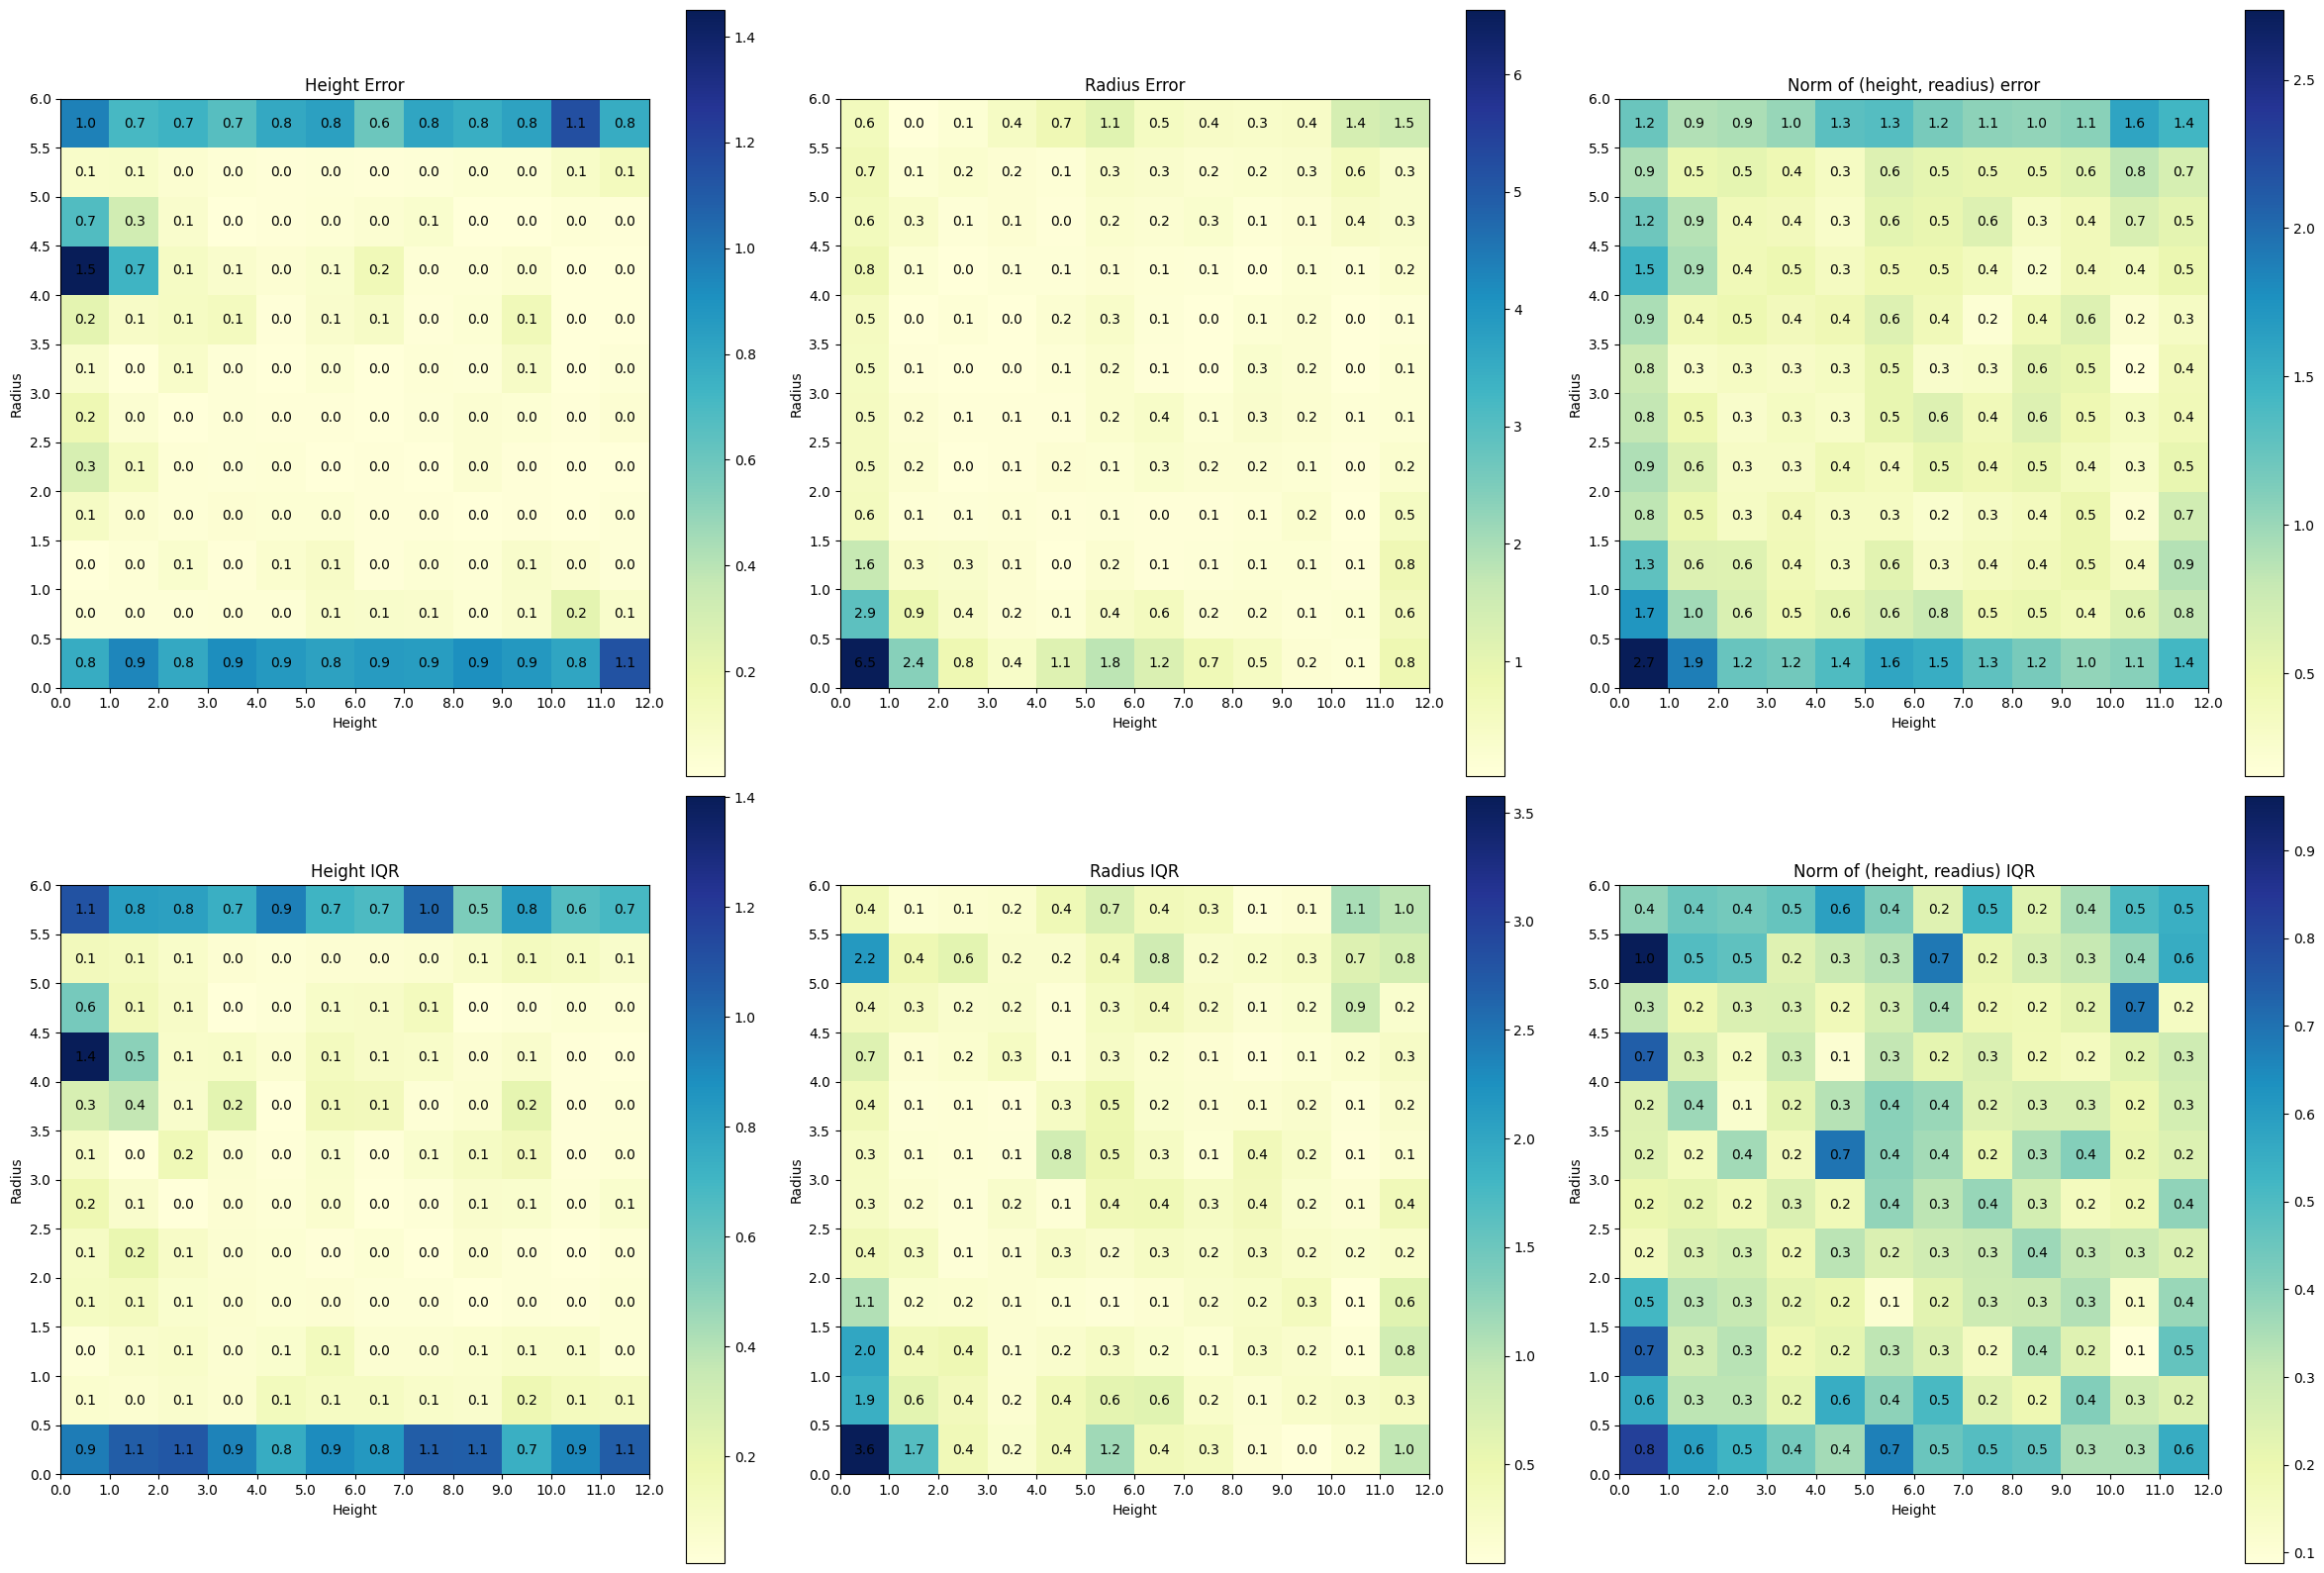

In [7]:
pieces_cnt = 12
test_data_size = 50
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, cyl.generate_array_of_cylinders, cylinder_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = True)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]
-----------
x_opt  = [1.40210886 0.95724063], x_err = 58.93409350374702
x_real = [1.  0.5]

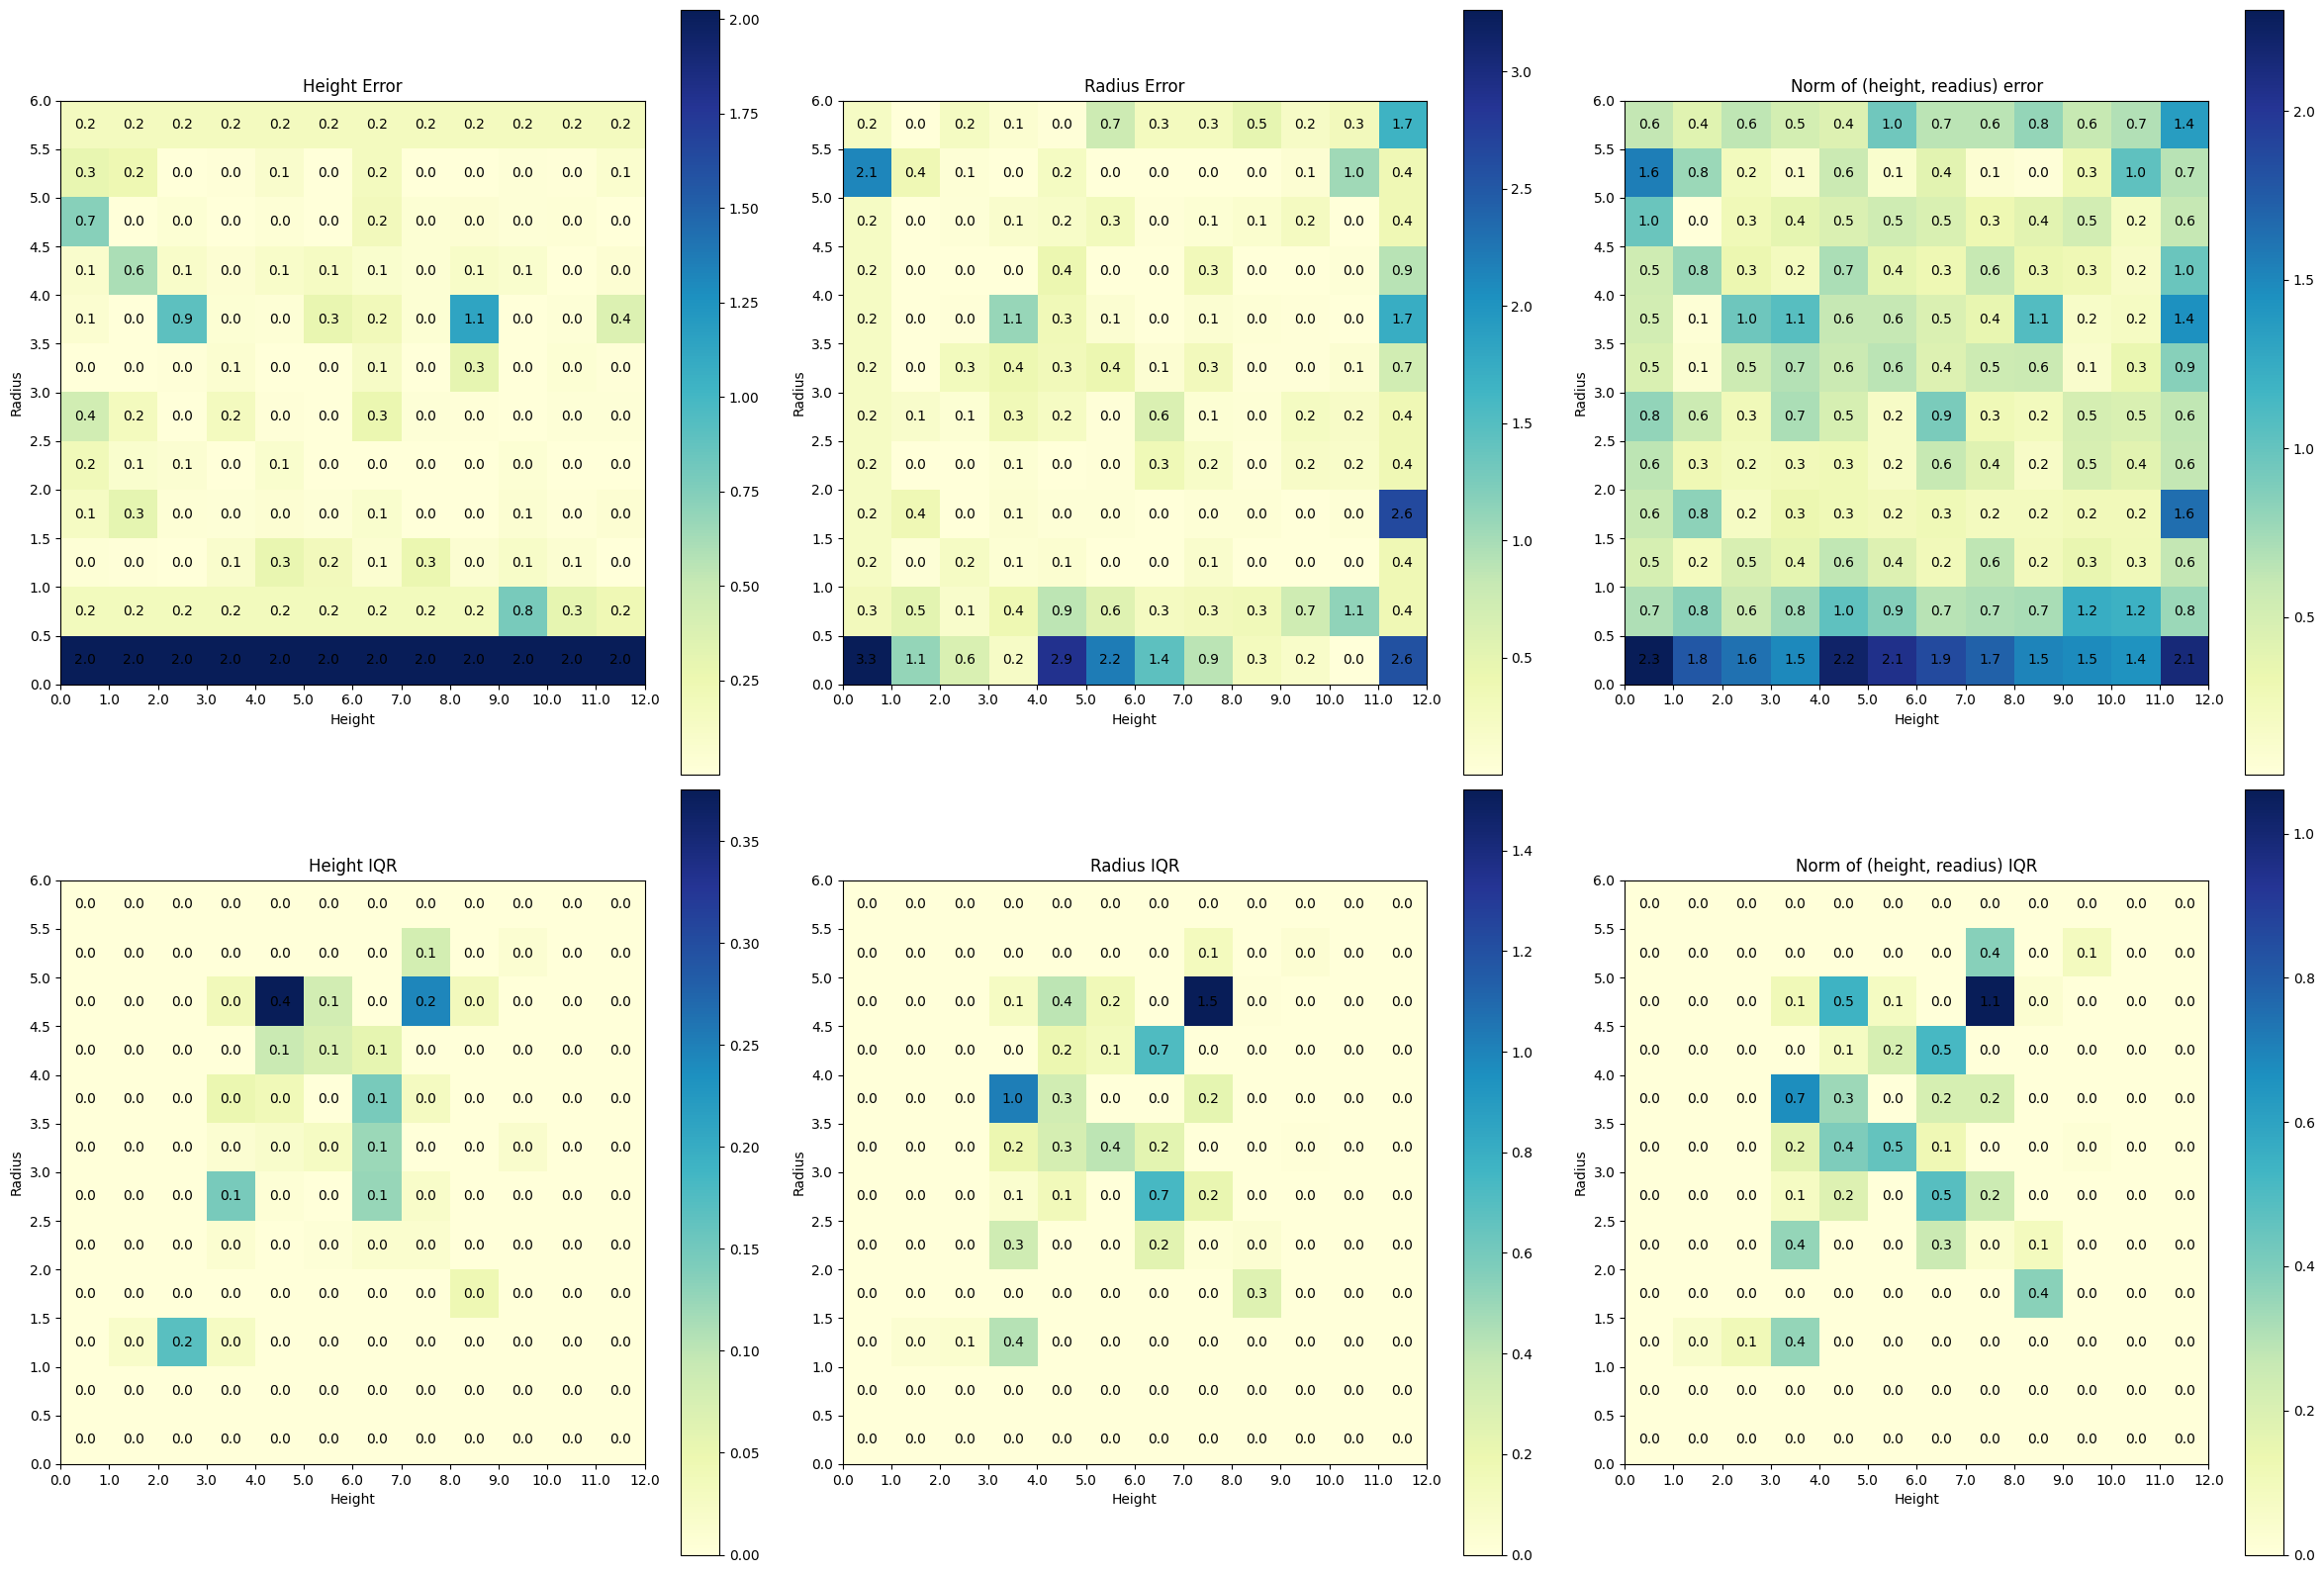